In [2]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\vengi\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [3]:
#IMPORTING--

import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine



RETREIVING DATA FROM DATABASE



In [4]:
#CONNECTION DETAILS

host = "branchhomeworkdb.cv8nj4hg6yra.ap-south-1.rds.amazonaws.com" 
port = "5432"              
database = "branchdsprojectgps" 
user = "datascientist" 
password = "47eyYBLT0laW5j9U24Uuy8gLcrN"

In [5]:
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"



DATA EXPLORATION AND PREPROCESSING OF DATA



In [7]:
#TABLE 1

query="""select * from loan_outcomes"""
loan_outcomes = pd.read_sql_query(query, connection_string)
print(loan_outcomes.head())
print(loan_outcomes.describe())
print(loan_outcomes.isnull().sum())

   user_id             application_at loan_outcome
0        1 2017-08-14 09:08:50.000000    defaulted
1        2 2016-05-17 10:10:12.447976       repaid
2        3 2016-10-20 10:07:20.459081    defaulted
3        4 2017-01-13 13:03:34.000000    defaulted
4        5 2016-11-03 15:41:39.124610       repaid
          user_id                 application_at
count  400.000000                            400
mean   200.500000  2017-08-02 04:03:22.879437312
min      1.000000            2015-06-29 15:30:55
25%    100.750000  2016-12-28 01:25:21.750000128
50%    200.500000            2017-08-12 12:03:18
75%    300.250000            2018-03-13 16:22:13
max    400.000000            2018-12-19 11:42:23
std    115.614301                            NaN
user_id           0
application_at    0
loan_outcome      0
dtype: int64


In [8]:
#TABLE 2

query="""select * from gps_fixes"""
gps_fixes = pd.read_sql_query(query, connection_string)
print(gps_fixes.head())
print(gps_fixes.describe())
print(gps_fixes.isnull().sum())

           gps_fix_at    server_upload_at  longitude  latitude  accuracy  \
0 2017-06-22 09:37:20 2017-06-22 09:43:42  36.840540 -1.294342      68.4   
1 2017-08-14 07:50:27 2017-08-14 09:05:27  36.895270 -1.341928    1409.0   
2 2017-06-13 10:34:29 2017-06-13 10:54:48  36.811903 -1.307220      68.4   
3 2017-06-18 12:16:20 2017-06-18 12:16:24  36.907049 -1.309984    1581.0   
4 2017-06-28 09:39:08 2017-06-28 09:58:12  36.839396 -1.280310    1396.0   

   altitude  bearing location_provider  user_id  
0       0.0      0.0             fused        1  
1       0.0      0.0             fused        1  
2       0.0      0.0             fused        1  
3       0.0      0.0             fused        1  
4       0.0      0.0             fused        1  
                          gps_fix_at               server_upload_at  \
count                          26710                          26710   
mean   2017-08-24 03:33:41.442718208  2017-08-26 18:55:34.808573696   
min              1970-01-05 08

In [9]:
#TABLE 3

query="""select * from user_attributes"""
user_attributes = pd.read_sql_query(query, connection_string)
print(user_attributes.head())
print(user_attributes.describe())
print(user_attributes.isnull().sum())

   user_id  age  cash_incoming_30days
0        1   42               8988.12
1        2   36               9968.12
2        3   27                 59.04
3        4   38               2129.03
4        5   33               2102.53
          user_id         age  cash_incoming_30days
count  400.000000  400.000000            400.000000
mean   200.500000   36.487500           7896.301075
std    115.614301   13.243236           7037.481340
min      1.000000   18.000000             11.900000
25%    100.750000   27.000000           2602.472500
50%    200.500000   34.000000           6004.240000
75%    300.250000   44.000000          10989.405000
max    400.000000  105.000000          41657.810000
user_id                 0
age                     0
cash_incoming_30days    0
dtype: int64


<Axes: title={'center': 'Loan Outcome Distribution'}, xlabel='loan_outcome', ylabel='Percentage'>

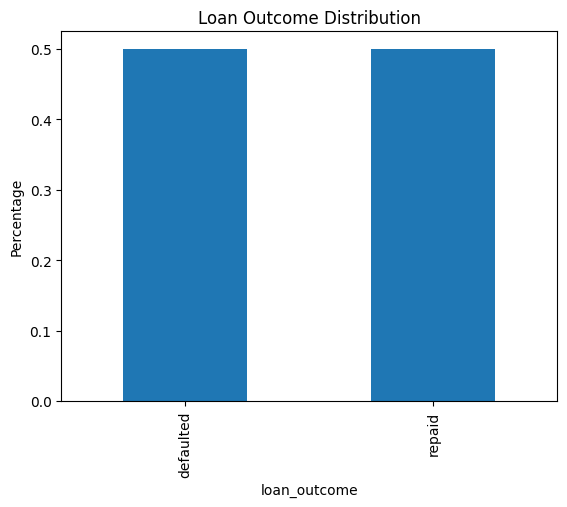

In [10]:
#TABLE 1 THE DISTRIBUTION OF LOAN REAID AND LOAN DEFAULTERS ARE EQUAL

loan_distribution = loan_outcomes['loan_outcome'].value_counts(normalize=True)
loan_distribution.plot(kind='bar', title='Loan Outcome Distribution', ylabel='Percentage')

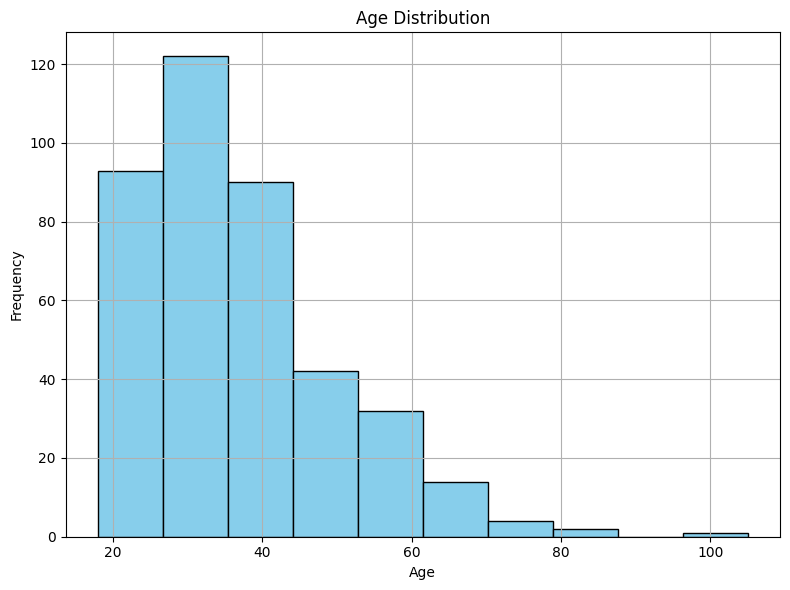

In [11]:
#ANALYSING WHICH GROUP OF AGE PEOPLE IS LENDING MORE LOAN

plt.figure(figsize=(8, 6))
user_attributes['age'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


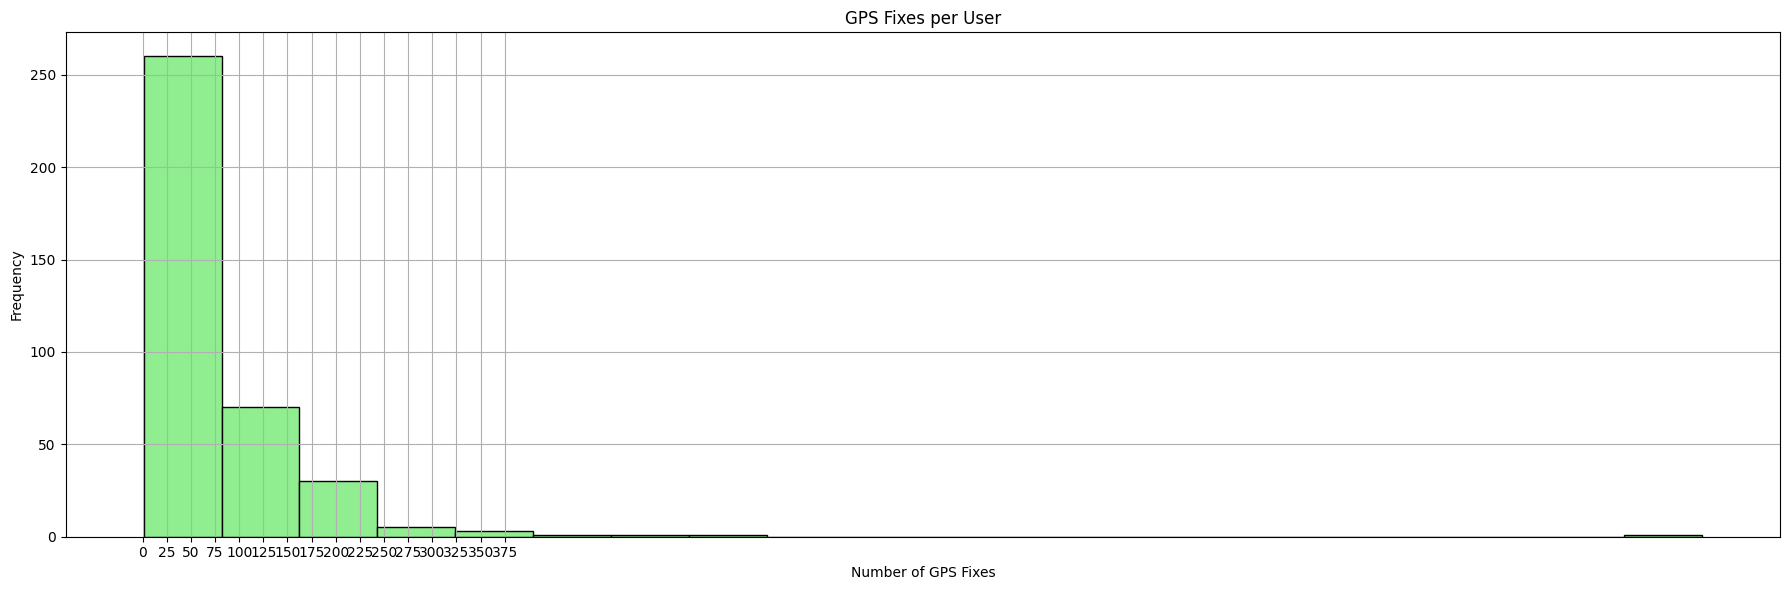

In [29]:
#GROUPING AND ANALYSING USERS BASED ON GPS ON MOBILE

gps_activity = gps_fixes.groupby('user_id').size()

plt.figure(figsize=(18,6))
gps_activity.hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('GPS Fixes per User')
plt.xlabel('Number of GPS Fixes')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,400,25))  

plt.tight_layout()
plt.show()


In [33]:
#CONVERTING REPAID TO 1 AND DEFAULT TO 0 

loan_outcomes['loan_outcome'] = loan_outcomes['loan_outcome'].map({'repaid': 1, 'defaulted': 0})


In [31]:
#Log-transform of the cash inflow to reduce skewness

user_attributes['cash_inflow_log'] = np.log1p(user_attributes['cash_incoming_30days'])

In [32]:

#Feature: Cash Inflow (log-transformed)
user_attributes['cash_inflow_log'] = user_attributes['cash_inflow_log']

In [34]:
# Aggregate GPS fixes by user

gps_features = gps_fixes.groupby('user_id').agg({
    'accuracy': 'mean',   
    'altitude': 'mean',  
    'bearing': 'std',  
    'latitude': 'mean', 
    'longitude': 'mean',
    'gps_fix_at': 'count'
}).reset_index()

# Rename the aggregated columns for clarity
gps_features.rename(columns={
    'accuracy': 'avg_accuracy',
    'altitude': 'avg_altitude',
    'bearing': 'bearing_std',
    'latitude': 'avg_latitude',
    'longitude': 'avg_longitude',
    'gps_fix_at': 'gps_activity_count'
}, inplace=True)


In [35]:
#Merge of data
merged_data = pd.merge(loan_outcomes, user_attributes, on='user_id', how='left')
merged_data = pd.merge(merged_data, gps_features, on='user_id', how='left')

merged_data.head()


,user_id,application_at,loan_outcome,age,cash_incoming_30days,cash_inflow_log,avg_accuracy,avg_altitude,bearing_std,avg_latitude,avg_longitude,gps_activity_count
0,1,2017-08-14 09:08:50.000000,0,42,8988.12,9.103770,1105.084571,75.690000,41.335283,-1.270427,36.782813,70.0
1,2,2016-05-17 10:10:12.447976,1,36,9968.12,9.207248,48.596000,1030.603000,58.250574,-1.488055,37.118432,10.0
2,3,2016-10-20 10:07:20.459081,0,27,59.04,4.095011,6.500000,2190.900000,NaN,-0.889673,35.707550,1.0
3,4,2017-01-13 13:03:34.000000,0,38,2129.03,7.663891,2172.200000,0.000000,0.000000,-0.306798,36.082255,2.0
4,5,2016-11-03 15:41:39.124610,1,33,2102.53,7.651372,43.461111,542.622222,101.186957,17.800041,-12.370879,9.0


In [37]:
from sklearn.model_selection import train_test_split

# Dropping non-feature columns
X = merged_data.drop(columns=['loan_outcome', 'user_id', 'application_at', 'gps_activity_count'])  

# Target variable
y = merged_data['loan_outcome']  

#handling missing data
merged_data.fillna(0, inplace=True)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.head()

,age,cash_incoming_30days,cash_inflow_log,avg_accuracy,avg_altitude,bearing_std,avg_latitude,avg_longitude
0,42,8988.12,9.103770,1105.084571,75.690000,41.335283,-1.270427,36.782813
1,36,9968.12,9.207248,48.596000,1030.603000,58.250574,-1.488055,37.118432
2,27,59.04,4.095011,6.500000,2190.900000,0.000000,-0.889673,35.707550
3,38,2129.03,7.663891,2172.200000,0.000000,0.000000,-0.306798,36.082255
4,33,2102.53,7.651372,43.461111,542.622222,101.186957,17.800041,-12.370879


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve

# Initialize the  RandomForestClassifier
model = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Predict the loan outcomes on the test set
y_pred = model.predict(X_test)


In [39]:
# Calculating evaluation metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Printing the evaluation metrics

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Accuracy: 0.6750
Precision: 0.7429
Recall: 0.6047
F1-Score: 0.6667
ROC-AUC: 0.7046


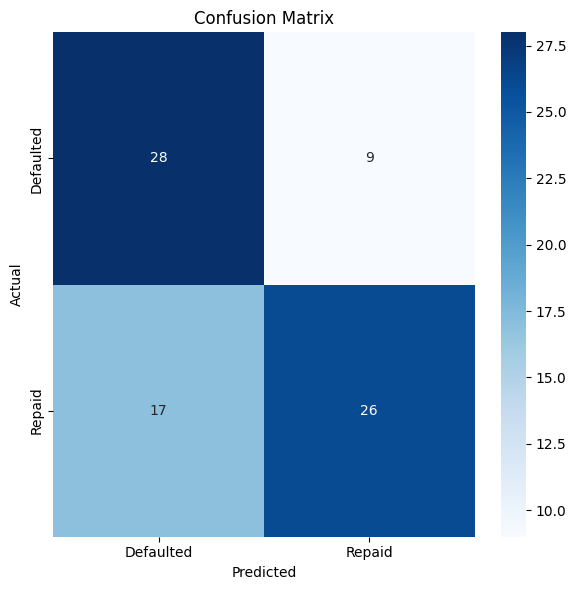

In [41]:
# Confusion Matrix--if diagonally dark means model is better
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Defaulted', 'Repaid'], yticklabels=['Defaulted', 'Repaid'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


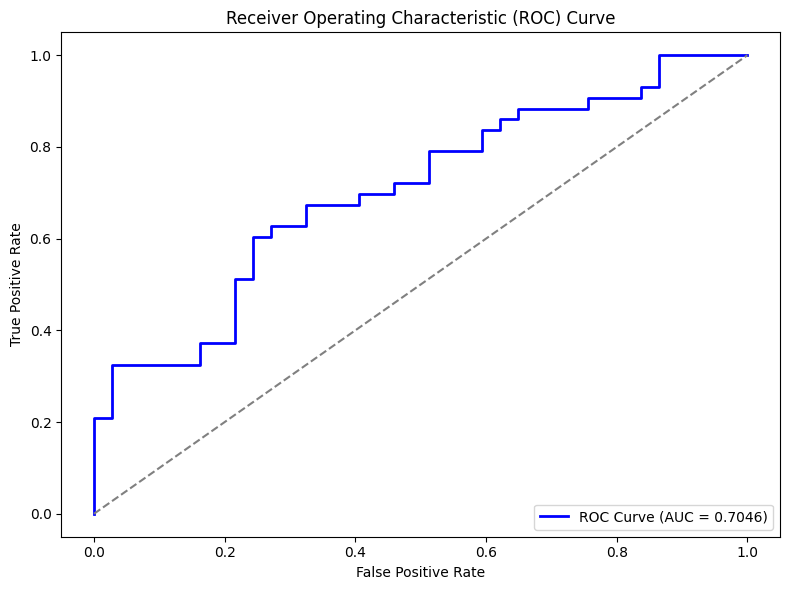

In [42]:
# Computing the  ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [43]:
#saving model to joblib

import joblib
joblib.dump(model, 'loan_predictor_model.pkl')

['loan_predictor_model.pkl']